### VGG16网络

In [ ]:
"""内容源自https://blog.csdn.net/weixin_44791964"""

"""
1、一张原始图片被resize到(224,224,3)。
2、两次[3,3]卷积网络，输出的特征层为64，输出为(224,224,64)，再2X2最大池化，输出net为(112,112,64)。
3、两次[3,3]卷积网络，输出的特征层为128，输出net为(112,112,128)，再2X2最大池化，输出net为(56,56,128)。
4、三次[3,3]卷积网络，输出的特征层为256，输出net为(56,56,256)，再2X2最大池化，输出net为(28,28,256)。
5、三次[3,3]卷积网络，输出的特征层为256，输出net为(28,28,512)，再2X2最大池化，输出net为(14,14,512)。
6、三次[3,3]卷积网络，输出的特征层为256，输出net为(14,14,512)，再2X2最大池化，输出net为(7,7,512)。
7、利用卷积的方式模拟全连接层，效果等同，输出net为(1,1,4096)。共进行两次。
8、利用卷积的方式模拟全连接层，效果等同，输出net为(1,1,1000)。
"""

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

In [2]:
def VGG16(num_classes):
    
    # 224, 224, 3
    image_input = keras.layers.Input(shape = (224, 224, 3))
    
    # 第一个卷积部分 unit 1
    # 112，112，64
    x = layers.Conv2D(64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block1_conv1')(image_input)
    x = layers.Conv2D(64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block1_conv2')(x)
    x = layers.MaxPool2D(pool_size=[2, 2], strides=2, name = 'block1_pool')(x)

    # 第二个卷积部分 unit 2
    # 56，56，128
    x = layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block2_conv1')(x)
    x = layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block2_conv2')(x)
    x = layers.MaxPool2D(pool_size=[2, 2], strides=2, name = 'block2_pool')(x)

    # 第三个卷积部分 unit 3
    # 28, 28, 256
    x = layers.Conv2D(256, kernel_size=[3, 3], padding="same",activation=tf.nn.relu,  name = 'block3_conv1')(x)
    x = layers.Conv2D(256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block3_conv2')(x)
    x = layers.Conv2D(256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block3_conv3')(x)
    x = layers.MaxPool2D(pool_size=[2, 2], strides=2, name = 'block3_pool')(x)

    # 第四个卷积部分 unit 4
    # 14,14,512
    x = layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block4_conv1')(x)
    x = layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block4_conv2')(x)
    x = layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block4_conv3')(x)
    x = layers.MaxPool2D(pool_size=[2, 2], strides=2, name = 'block4_pool')(x)

    # 第五个卷积部分 unit 5
    # 7,7,512
    x = layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block5_conv1')(x)
    x = layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block5_conv2')(x)
    x = layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu, name = 'block5_conv3')(x)  
    x = layers.MaxPool2D(pool_size=[2, 2], strides=2, name = 'block5_pool')(x)
    
    
    # 分类部分
    # 7x7x512  25088
    x = layers.Flatten(name = 'flatten')(x)
    # 4096   此处参数：25088 * 4096 + 4096 = 102764544（wx+b）
    x = layers.Dense(4096, activation = 'relu', name = 'fullc1')(x)
    # 4096
    x = layers.Dense(4096, activation = 'relu', name = 'fullc2')(x)
    # num_classes
    x = layers.Dense(num_classes, activation = 'softmax', name = 'fullc3')(x)
    
    model = keras.Model(image_input, x, name = 'vgg16')

    return model
    

In [3]:
model = VGG16(1000)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'


model = VGG16(1000)
weights_path = tf.keras.utils.get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5',
                                        WEIGHTS_PATH,
                                        cache_subdir='models')

model.load_weights(weights_path)

In [5]:
img_path = 'image_of_predict/Sika_deer.jpg'
img = image.load_img(img_path, target_size=(224, 224))

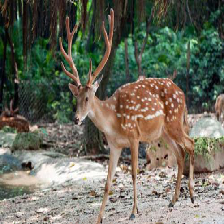

In [6]:
img

In [7]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [8]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [9]:
np.max(x),np.min(x),np.mean(x)

(255.0, 0.0, 102.28195)

In [10]:
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [11]:
np.max(x),np.min(x),np.mean(x)

(151.061, -123.68, -12.517383)

In [12]:
preds = model.predict(x)

In [13]:
preds
print('Predicted:', decode_predictions(preds))

Predicted: [[('n02422699', 'impala', 0.85781455), ('n02423022', 'gazelle', 0.1394214), ('n02422106', 'hartebeest', 0.0023190177), ('n02018795', 'bustard', 0.00018127591), ('n02417914', 'ibex', 8.29005e-05)]]
